# 오토인코더

오토인코더(autoencoder1)는 입력 데이터 그 자체를 예측 목표(target)로 하는 학습 방법이다. 히든 레이터의 변수를 입력 차원보다 작게 놓으면 압축(compression) 또는 차원 감소(dimension reduction) 효과를 가진다.

<img src="https://datascienceschool.net/upfiles/aed3c00ec2554dceb3b6558e778612cb.jpeg" width="100%">

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'   # 한글 설정
plt.rc('axes', unicode_minus=False)    # '-' 표시가 가능하도록

# # colab 한글 설정
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# # 나눔고딕 폰트로 설정
# font_prop = fm.FontProperties(fname=font_path)
# plt.rc('font', family=font_prop.get_name())

In [3]:
from keras.datasets import mnist

(x_train_2d, _), (_, _) = mnist.load_data()
x_train_2d = x_train_2d.astype(np.float32) / 255.0
x_train = x_train_2d.reshape(-1, np.prod(x_train_2d.shape[1:])) 

In [4]:
x_train.shape

(60000, 784)

In [5]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Sequential

input_dim = x_train.shape[1]
encoding_dim = 32

autoencoder1 = Sequential()
autoencoder1.add(Dense(encoding_dim, input_dim=input_dim, activation='relu'))
autoencoder1.add(Dense(input_dim, activation='sigmoid'))

auto


In [ ]:
autoencoder1.compile(optimizer="adam", loss="binary_crossentropy")

In [6]:
%%time
history = autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, verbose=0)

CPU times: total: 25.7 s
Wall time: 51.7 s


1/1 [==============================] - 0s 110ms/step


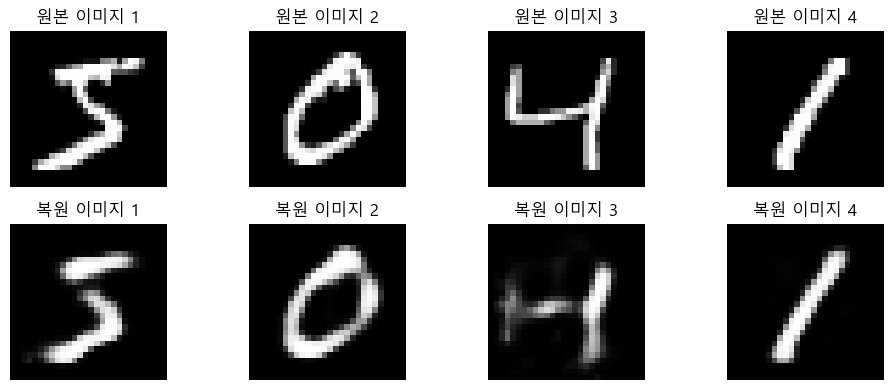

In [7]:

n = 4
x_train_recoverd = autoencoder1.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
from keras.models import Model

encoder = Model(autoencoder1.input, autoencoder1.layers[0].output)

In [9]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras import layers

input_decoder = layers.Input(shape=(encoding_dim,))
decoder = Model(input_decoder, autoencoder1.layers[1](input_decoder))

In [10]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 50ms/step


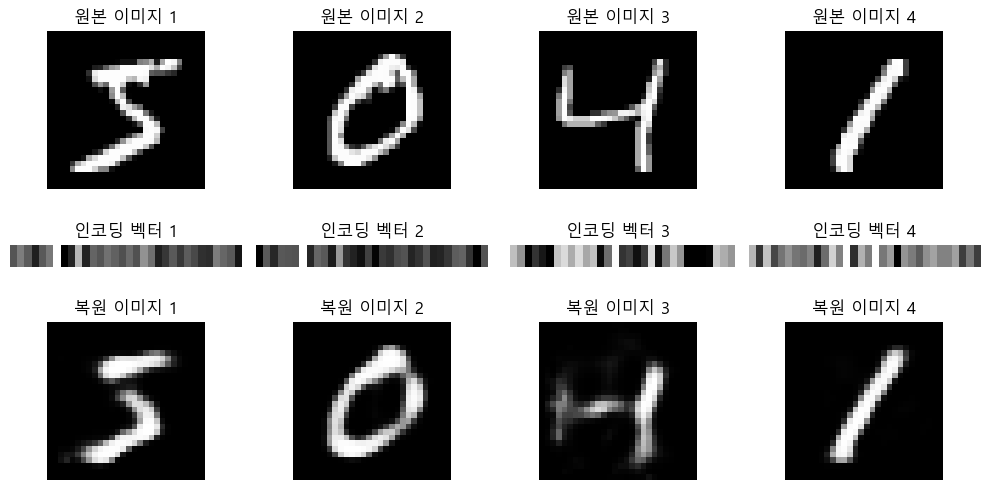

In [11]:
n = 4
x_train_encode = encoder.predict(x_train[:n, :])
x_train_recoverd = decoder.predict(x_train_encode)

plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_encode[i].reshape(1, encoding_dim), aspect=3)
    plt.title("인코딩 벡터 {}".format(i + 1))
    plt.axis("off")
    
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

## 다층 오토인코더

In [15]:
encoding_dim1 = 128
encoding_dim2 = 64
encoding_dim3 = 32

autoencoder2 = Sequential()
autoencoder2.add(Dense(encoding_dim1, input_dim=input_dim, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim3, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim1, activation='relu'))
autoencoder2.add(Dense(input_dim, activation='sigmoid'))
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")

In [16]:
%%time
history = autoencoder2.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, verbose=0)

CPU times: total: 1min 17s
Wall time: 2min 23s


1/1 [==============================] - 0s 118ms/step


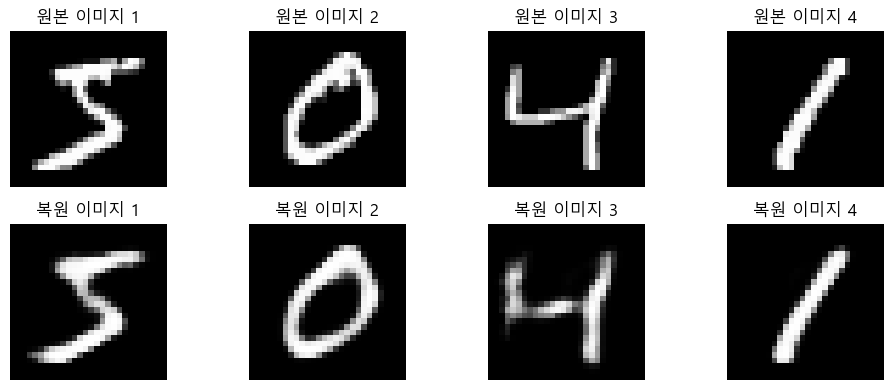

In [17]:
n = 4
x_train_recoverd = autoencoder2.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

## CNN 오토인코더

In [18]:
x_train_2d_c = np.expand_dims(x_train_2d, -1)

In [19]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

autoencoder3 = Sequential()
# 인코딩
autoencoder3.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
autoencoder3.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
# 디코딩
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder3.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                      

In [20]:
%%time
history = autoencoder3.fit(x_train_2d_c, x_train_2d_c, 
                           epochs=10, batch_size=256, shuffle=True, verbose=0)

CPU times: total: 8min 24s
Wall time: 4min 53s


1/1 [==============================] - 0s 97ms/step


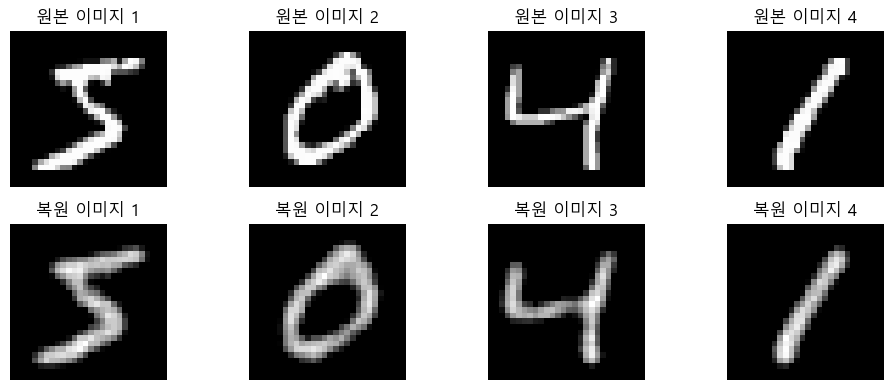

In [21]:
n = 4
x_train_recoverd = autoencoder3.predict(x_train_2d_c[:n])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train_2d[i])
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

## 2D Deconvolution

In [22]:
from keras.layers import Conv2DTranspose

autoencoder4 = Sequential()
# 인코딩
autoencoder4.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder4.add(MaxPooling2D(2, padding='same'))
autoencoder4.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder4.add(MaxPooling2D(2, padding='same'))


# 디코딩
# autoencoder3.add(UpSampling2D(2))
# autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
# autoencoder3.add(UpSampling2D(2))
# autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))
autoencoder4.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder4.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder4.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder4.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder4.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                      

In [23]:
%%time
history = autoencoder4.fit(x_train_2d_c, x_train_2d_c, epochs=20, batch_size=256, shuffle=True, verbose=0)

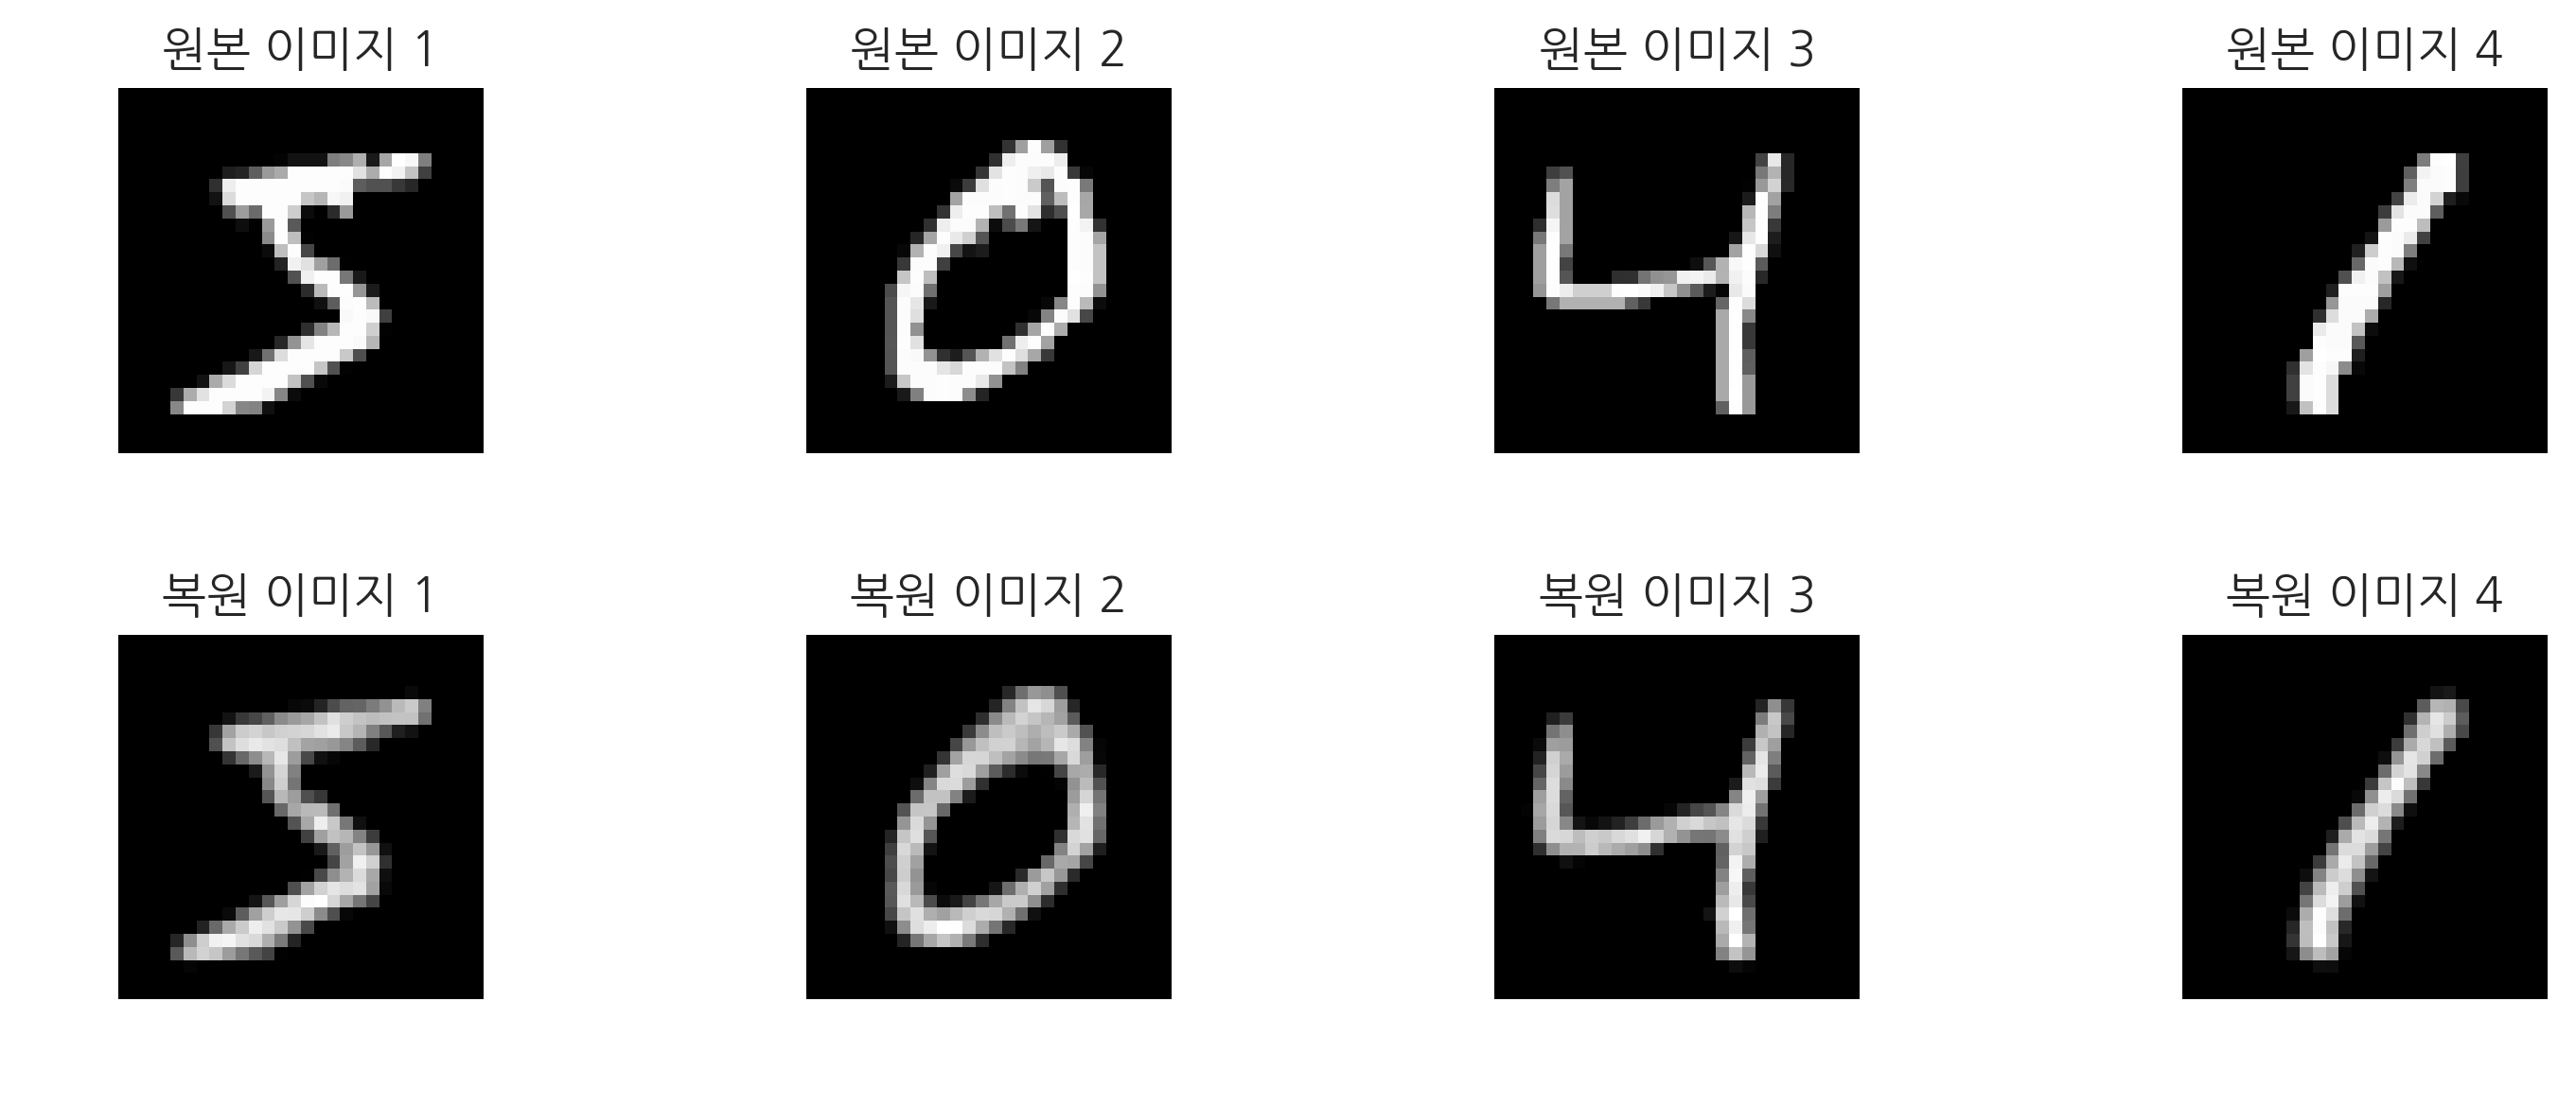

In [19]:
n = 4
x_train_recoverd = autoencoder4.predict(x_train_2d_c[:n])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train_2d[i])
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()